In [5]:
# !pip install spacy

In [7]:
# !pip install sentence_transformers --index-url=https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

In [9]:
# !pip install en_core_web_sm-3.1.0-py3-none-any.whl

In [11]:
# !pip install torch

In [2]:
import spacy
import en_core_web_sm

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

nlp = spacy.load("en_core_web_sm")

In [3]:
df_combined_web_iva_search = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/combined_new_adult-child_outer_new.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,1,2,4,5,9,10,11,12,13,14,15,16,17,18,20,21,23,24,25,26,27,28,29,31,33,39,41,56,57,58,59,63,64,65,67,68,70,71,74,75,77,78,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106,108,109,110,111,112,113,114,115,116,117,118,119,122,123,124,125,126,127,128,129,130,131,132,134,135,136,137,138,155,156,159,160,161,164,165) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_combined_web_iva_search.columns.to_list()

['agent_entitlement_client_name',
 'agent_entitlement_access_key',
 'channel',
 'companytracking_clientid',
 'companytracking_companyid',
 'companytracking_companyname',
 'companytracking_multitenantid',
 'entry_id',
 'entry_order',
 'entry_type',
 'input',
 'inputnotunderstood_type',
 'knowledge_category',
 'knowledge_category_path',
 'navigation_url',
 'next_unit_hit',
 'previous_unit_hit',
 'response_condition',
 'response_text',
 'session_id',
 'session_start_utc',
 'session_start_cst',
 'transactioncontribution_factor',
 'unit_name',
 'agent_session_id',
 'time_submitted_utc',
 'time_submitted_cst',
 'unit_id',
 'response_name',
 'related_links',
 'matched_search_criteria',
 'agent_user_id',
 'escalation_type',
 'companytracking_personalid',
 'person_internal_id',
 'client_id',
 'prompting_task',
 'prompting_task_step',
 'other_active_tasks',
 'complete_tasks',
 'cancelled_tasks',
 'conversation_rating_random_sample_queue',
 'conversation_rating_all_conversations_queue',
 'convers

In [5]:
df_combined_web_iva_search[['client_id','person_internal_id','input','search_text','page_name','unit_name','next_unit_hit']].head()

,client_id,person_internal_id,input,search_text,page_name,unit_name,next_unit_hit
0,8141,0,step child a dependent?,NaN,NaN,Benefits Eligibility For Stepchildren,NaN
1,8141,0,how do i change my dependent daycare deduction,NaN,NaN,Adding or Removing a Dependent _CORE_,Flexible Spending Account
2,8141,0,Child last name change,NaN,NaN,Updating Legal Name,NaN
3,8141,0,i am trying to add my children as beneficiarie...,NaN,NaN,Life Insurance Beneficiaries,Website Issues
4,8141,0,how much timeoff do i get after the birth of m...,NaN,NaN,Paid Time Off Accrual,Contact Us Page - Web Link Only


In [6]:
df_combined_web_iva_search[['unit_name','next_unit_hit']].isna().sum()

unit_name        643278
next_unit_hit    825645
dtype: int64

In [7]:
df_combined_web_iva_search = df_combined_web_iva_search.drop(['next_unit_hit'],axis=1)

In [8]:
df_iva = pd.read_csv("s3://adl-core-sagemaker-studio/external/Deepali/IVA_cleaned_labelled(session_id_added).csv")

In [9]:
# df_iva.columns.to_list()

In [10]:
df_iva[['unit_name','next_unit_hit']].isna().sum()

unit_name             0
next_unit_hit    597116
dtype: int64

In [11]:
df_iva1 = df_iva.drop(['Unnamed: 0','entry_id','next_unit_hit',
             'previous_unit_hit','response_text','session_id'], axis=1)

In [12]:
df_iva1.head()

,client_id,person_internal_id,input_orig,labels,input_cleaned,input_cleaned_dl,unit_name
0,245,421510022,Open enrollment,Enrollment,open enrol,open enrollment,Annual Enrollment Clarifier
1,695,25710045,enroll in hra,HRA,enrol hra,enroll in hra,Health Reimbursement Account Clarifier
2,4693,54010081,TIRE DISCOUNT,Discounts Issue,tire discount,tire discount,Discounts Clarifier
3,9086,120000074,eligible,HSA related,elig,eligible,Health Savings Account (HSA) Eligible Expenses
4,2360,22900018,Need to update my mail address,General Acount issue,need updat mail address,need to update my mail address,Manage Address


In [13]:
df_iva2 = df_iva1.drop(['input_cleaned','input_cleaned_dl'], axis=1)

In [14]:
df_iva2[['labels','unit_name']].isna().sum()

labels       0
unit_name    0
dtype: int64

In [15]:
df_iva2.head()

,client_id,person_internal_id,input_orig,labels,unit_name
0,245,421510022,Open enrollment,Enrollment,Annual Enrollment Clarifier
1,695,25710045,enroll in hra,HRA,Health Reimbursement Account Clarifier
2,4693,54010081,TIRE DISCOUNT,Discounts Issue,Discounts Clarifier
3,9086,120000074,eligible,HSA related,Health Savings Account (HSA) Eligible Expenses
4,2360,22900018,Need to update my mail address,General Acount issue,Manage Address


In [16]:
df_iva3 = pd.read_csv("s3://adl-core-sagemaker-studio/external/Deepali/IVA_cleaned_labelled_merged.csv")

In [17]:
df_iva3.head()

,client_id,person_internal_id,session_id,input_orig,response_text,unit_name
0,245,342020022,13134207,does my fsa carry over,This information isn't available yet.,Flexible Spending Account (FSA) Rollover
1,936,12351089,13134208,hi | leave/time off,Hi there. What would you like help with today?...,Hello | Paid Time Off Clarifier
2,936,32861032,13134215,How much does covid pay cover,For possible impacts to your benefits related ...,Natural Disaster
3,5888,379001056,13134216,I want to roll my future builder into an ira |...,It looks like you're asking about your FutureB...,401k/403b/457 Clarifier | I Don't Know
4,1040,147720041,13134224,cancel dental,There are 2 ways to cancel your benefits cover...,Cancel Coverage


In [18]:
df_iva3 = df_iva3.rename(columns={'input_orig':'input_orig_1'})

In [19]:
df_iva3 = df_iva3.drop(['session_id','response_text'], axis=1)

In [20]:
# Split the 'col' column using '|' delimiter
df_iva3['input_orig_1'] = df_iva3['input_orig_1'].str.split('|')

In [21]:
# Reset the index
df_iva3 = df_iva3.reset_index(drop=True)

In [22]:
df_iva3.sample()

,client_id,person_internal_id,input_orig_1,unit_name
834104,5094,63600089,[adding a domestic partner],Manage Domestic Partner Dependent


In [23]:
df_combined_web_iva_search.sample()

,agent_entitlement_client_name,agent_entitlement_access_key,channel,companytracking_clientid,companytracking_companyid,companytracking_companyname,companytracking_multitenantid,entry_id,entry_order,entry_type,...,load_timestamp,source_system_code,mobile_app_device_type,page_load_elapsed_time,mobile_app_type,session_create_date_cst_timezone_partition,platform_id_y,search_text,search_results,session_created_timestamp
1039074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-12-21 03:56:41,2o,NaN,29.0,Unused,2022-12-15,NaN,NaN,NaN,NaN


In [24]:
df_combined_web_iva_search = df_combined_web_iva_search[['client_id','person_internal_id','input','search_text','page_name','unit_name']]

In [25]:
df_concat = pd.concat([df_combined_web_iva_search, df_iva2, df_iva3], axis=0)

In [26]:
df_concat.columns

Index(['client_id', 'person_internal_id', 'input', 'search_text', 'page_name',
       'unit_name', 'input_orig', 'labels', 'input_orig_1'],
      dtype='object')

In [27]:
df_concat[['unit_name','labels']].isna().sum()

unit_name     643278
labels       2597406
dtype: int64

In [28]:
df_concat = df_concat.drop(['labels'],axis=1)

In [29]:
df_concat.head()

,client_id,person_internal_id,input,search_text,page_name,unit_name,input_orig,input_orig_1
0,8141,0,step child a dependent?,NaN,NaN,Benefits Eligibility For Stepchildren,NaN,NaN
1,8141,0,how do i change my dependent daycare deduction,NaN,NaN,Adding or Removing a Dependent _CORE_,NaN,NaN
2,8141,0,Child last name change,NaN,NaN,Updating Legal Name,NaN,NaN
3,8141,0,i am trying to add my children as beneficiarie...,NaN,NaN,Life Insurance Beneficiaries,NaN,NaN
4,8141,0,how much timeoff do i get after the birth of m...,NaN,NaN,Paid Time Off Accrual,NaN,NaN


In [30]:
# df_concat2 = df_concat[['client_id','person_internal_id','input','input_orig_1','input_orig','search_text','page_name','labels']]

In [31]:
df_concat.to_csv('df_concat.csv')

In [32]:
# select the columns to stack
cols_to_stack = ['input', 'input_orig_1', 'input_orig']

# stack the columns using melt
stacked = pd.melt(df_concat, id_vars=['client_id','person_internal_id','search_text', 'page_name', 'unit_name'], 
                  value_vars=cols_to_stack, var_name='stacked_cols', value_name='stacked_input')
# stacked = pd.melt(df_concat2, id_vars=['client_id','person_internal_id','search_text', 'page_name', 'labels'], 
#                   value_vars=cols_to_stack, var_name='stacked_cols', value_name='stacked_input')

In [33]:
stacked.head()

,client_id,person_internal_id,search_text,page_name,unit_name,stacked_cols,stacked_input
0,8141,0,NaN,NaN,Benefits Eligibility For Stepchildren,input,step child a dependent?
1,8141,0,NaN,NaN,Adding or Removing a Dependent _CORE_,input,how do i change my dependent daycare deduction
2,8141,0,NaN,NaN,Updating Legal Name,input,Child last name change
3,8141,0,NaN,NaN,Life Insurance Beneficiaries,input,i am trying to add my children as beneficiarie...
4,8141,0,NaN,NaN,Paid Time Off Accrual,input,how much timeoff do i get after the birth of m...


In [34]:
# # use applymap to check the type of each element in the DataFrame
# list_cols = stacked.applymap(lambda x: isinstance(x, list)).any()

# # print the list columns
# print(list_cols[list_cols == True])

In [35]:
# stacked['stacked_input'][8]

In [36]:
stacked.shape

(14782416, 7)

In [37]:
stacked.dropna(subset=['search_text','page_name','stacked_input'], how='all', inplace=True)

In [38]:
stacked['stacked_input'] = stacked['stacked_input'].apply(str)
stacked.drop_duplicates(inplace=True)


In [39]:
stacked.head()

,client_id,person_internal_id,search_text,page_name,unit_name,stacked_cols,stacked_input
0,8141,0,NaN,NaN,Benefits Eligibility For Stepchildren,input,step child a dependent?
1,8141,0,NaN,NaN,Adding or Removing a Dependent _CORE_,input,how do i change my dependent daycare deduction
2,8141,0,NaN,NaN,Updating Legal Name,input,Child last name change
3,8141,0,NaN,NaN,Life Insurance Beneficiaries,input,i am trying to add my children as beneficiarie...
4,8141,0,NaN,NaN,Paid Time Off Accrual,input,how much timeoff do i get after the birth of m...


In [40]:
stacked = stacked.drop(['stacked_cols'], axis=1)

In [41]:
stacked.shape

(4027329, 6)

In [42]:
import string
import nltk
nltk.data.path.append('../../nltk_data')
from nltk.corpus import stopwords
# nltk.download('stopwords')


In [43]:
def clean_text(df, text_cols):
    # Create a new dataframe to hold the cleaned text columns
    cleaned_df = pd.DataFrame()
    
    # Define the list of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Clean each text column and add it to the cleaned dataframe
    for text_col in text_cols:
        text_list = df[text_col].tolist()
        text_list = [str(text) for text in text_list]
        text_list = [text if text.strip() and not
                     set(text).issubset(set(string.punctuation + string.whitespace)) else '' 
                     for text in text_list]
        text_list = [x.lower() for x in text_list]
        translator = str.maketrans(string.punctuation + string.digits + "_", " " * len(
            string.punctuation + string.digits + "_"))
        cleaned_list = []
        for text in text_list:
            cleaned_text = text.translate(translator)
            cleaned_text = ' '.join(cleaned_text.split())
            cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in stop_words])
            cleaned_list.append(cleaned_text)
        cleaned_df[text_col] = cleaned_list
    
    # Add the non-text columns to the cleaned dataframe
    for col in df.columns:
        if col not in text_cols:
            cleaned_df[col] = df[col]
    
    return cleaned_df


In [44]:
df_concat3 = clean_text(stacked, text_cols=['stacked_input','search_text','page_name'])
# cleaned_stacked, removed_rows = clean_text(stacked, text_cols=['stacked_input','search_text','page_name'])

In [45]:
df_concat3.head(5)

,stacked_input,search_text,page_name,client_id,person_internal_id,unit_name
0,step child dependent,nan,nan,8141.0,0.0,Benefits Eligibility For Stepchildren
1,change dependent daycare deduction,nan,nan,8141.0,0.0,Adding or Removing a Dependent _CORE_
2,child last name change,nan,nan,8141.0,0.0,Updating Legal Name
3,trying add children beneficiaries life ins,nan,nan,8141.0,0.0,Life Insurance Beneficiaries
4,much timeoff get birth child,nan,nan,8141.0,0.0,Paid Time Off Accrual


In [46]:
df_concat4 = df_concat3.replace('nan', '')
df_concat4.head()

,stacked_input,search_text,page_name,client_id,person_internal_id,unit_name
0,step child dependent,,,8141.0,0.0,Benefits Eligibility For Stepchildren
1,change dependent daycare deduction,,,8141.0,0.0,Adding or Removing a Dependent _CORE_
2,child last name change,,,8141.0,0.0,Updating Legal Name
3,trying add children beneficiaries life ins,,,8141.0,0.0,Life Insurance Beneficiaries
4,much timeoff get birth child,,,8141.0,0.0,Paid Time Off Accrual


In [47]:
df_concat4['text'] = df_concat4[['stacked_input', 'search_text', 'page_name']].apply(lambda x: ' '.join([str(i) for i in x if not pd.isna(i)]), axis=1)

In [48]:
df_concat4.drop(['stacked_input','search_text','page_name'], inplace=True, axis=1)

In [49]:
df_concat4.head()

,client_id,person_internal_id,unit_name,text
0,8141.0,0.0,Benefits Eligibility For Stepchildren,step child dependent
1,8141.0,0.0,Adding or Removing a Dependent _CORE_,change dependent daycare deduction
2,8141.0,0.0,Updating Legal Name,child last name change
3,8141.0,0.0,Life Insurance Beneficiaries,trying add children beneficiaries life ins
4,8141.0,0.0,Paid Time Off Accrual,much timeoff get birth child


In [50]:
df_concat4.drop_duplicates(subset=['text'], inplace=True)

In [51]:
df_concat4.shape

(1857184, 4)

In [52]:
# Get the value counts of the 'labels' column
label_counts = df_concat4['unit_name'].value_counts()
print(sum(label_counts>500))
# Filter the dataframe to only include rows where the label count is greater than 10000
df_concat5 = df_concat4[df_concat4['unit_name'].isin(label_counts[label_counts > 10000].index)]

# Get the shape of the resulting filtered dataframe
df_concat5_shape = df_concat5.shape

27


In [53]:
df_concat5_shape

(0, 4)

In [54]:
df_concat5['unit_name'].value_counts()

Series([], Name: unit_name, dtype: int64)

In [55]:
df_concat4[df_concat4['text']=='nan '].value_counts()

Series([], dtype: int64)

In [56]:
df_concat4.head()

,client_id,person_internal_id,unit_name,text
0,8141.0,0.0,Benefits Eligibility For Stepchildren,step child dependent
1,8141.0,0.0,Adding or Removing a Dependent _CORE_,change dependent daycare deduction
2,8141.0,0.0,Updating Legal Name,child last name change
3,8141.0,0.0,Life Insurance Beneficiaries,trying add children beneficiaries life ins
4,8141.0,0.0,Paid Time Off Accrual,much timeoff get birth child


### finding the texts which contain exact phrases from synonyms list

In [22]:
words_3 = ['day care', 'creche', 'childcare', 'daycare', 'after school care', 'pre school', 'child', 'baby', 'infant',
           'girl child', 'play school', 'boy child', 'Adolescent', 'nursery', 'preschool', 'day nursery', 'playschool', 
           'kindergarten', 'childminding', 'babysitting', 'babysitter', 'nanny', 'children supervision', 'toddler care', 
           'baby sitter', 'children', 'child supervision', 'childs', 'stepchild', 'step daughter', 'step son', 'grandchildren', 
           'grandchild', 'daughter', 'son', 'stepchildren', 'childhood', 'day cares', 'childrent', 'daycares', 'childplus']
words_4 = list(set([word.lower() for word in words_3]))
len(words_4)

41

In [58]:
# words_3 = ['elder','elder women','elder','Octogenarians','Nonagenarians','Centenarians',
# 'elderly people',
#  'senior assistance',
#  'grey generation',
#  'senior health',
#  'elderly companion',
#  'senior citizen',
#  'elderly',
#  'senior members',
#  'elderly residents',
#  'senior assistance',
#  'grey generation',
#  'elder',
#  'elderly',
#  'elderly people',
#  'elderly residents',
#  'elder',
#  'elder',
#  'senior citizen',
#  'elder generation',
#  'gerontology',
#  'elderly population',
#  'senior members',
#  'retirees',
#  'elderly population',
#  'eldercare',
#  'elder',
# 'eldercae', 'eldercarr', 'eldermann',
# 'eldercre','eldery','elderman','elders','eldercrae']
# words_4 = list(set([word.lower() for word in words_3]))
# len(words_4)

In [59]:
# words_3 = ['elder', 'elder women', 'Octogenarians', 'Nonagenarians', 'Centenarians', 'elderly people', 'senior assistance', 
#  'grey generation', 'senior health', 'elderly companion', 'senior citizen', 'elderly', 'senior members', 'elderly residents', 
#  'elder generation', 'gerontology', 'elderly population', 'retirees', 'eldercare', 'eldery', 'elderman']
# words_4 = list(set([word.lower() for word in words_3]))
# len(words_4)

In [60]:
mask = (df_concat4['text'].str.contains(r'\b(' + '|'.join(words_4) + r')\b', case=False, na=False))

df_concat4['category'] = ''
df_concat4.loc[mask, 'category'] = 'Child care'
# df_combined_web_iva_search.loc[df_combined_web_iva_search['category'] == '', 'category'] = 'Other'

df_concat4.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,client_id,person_internal_id,unit_name,text,category
0,8141.0,0.0,Benefits Eligibility For Stepchildren,step child dependent,Child care
1,8141.0,0.0,Adding or Removing a Dependent _CORE_,change dependent daycare deduction,Child care
2,8141.0,0.0,Updating Legal Name,child last name change,Child care
3,8141.0,0.0,Life Insurance Beneficiaries,trying add children beneficiaries life ins,Child care
4,8141.0,0.0,Paid Time Off Accrual,much timeoff get birth child,Child care


In [61]:
# df_concat4[df_concat4['category']=='Elder care'].sample(20)['text'].to_list()

In [62]:
df_concat4[df_concat4['category']=='Child care'].shape

(139289, 5)

In [63]:
# df_concat4.to_parquet('ec_df_concat6.pqt')

In [64]:
# df_concat4 = pd.read_parquet('ec_df_concat6.pqt')

In [65]:
df_concat4['category'].value_counts()

              1717895
Child care     139289
Name: category, dtype: int64

In [66]:
df_concat4['unit_name'].value_counts()

Child Care Plus Information                                8282
Tying Units                                                7987
I Don't Know                                               6390
Benefits Eligibility for Adopted or Biological Children    5632
Adding or Removing a Dependent                             5024
                                                           ... 
HDHP Coverage                                                 1
Vision Plan Costs _CORE_                                      1
Hiring Guidelines                                             1
Cost of Life Insurance                                        1
Evidence of Insurability (EOI) Form                           1
Name: unit_name, Length: 808, dtype: int64

In [67]:
df_concat4.head()

,client_id,person_internal_id,unit_name,text,category
0,8141.0,0.0,Benefits Eligibility For Stepchildren,step child dependent,Child care
1,8141.0,0.0,Adding or Removing a Dependent _CORE_,change dependent daycare deduction,Child care
2,8141.0,0.0,Updating Legal Name,child last name change,Child care
3,8141.0,0.0,Life Insurance Beneficiaries,trying add children beneficiaries life ins,Child care
4,8141.0,0.0,Paid Time Off Accrual,much timeoff get birth child,Child care


In [72]:
df_concat4.to_csv('cc_df_concat4_temp.csv')

In [15]:
df_concat4 = pd.read_csv('cc_df_concat4_temp.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
df_concat4.shape

(1857184, 6)

### get text which are similar to phrases in synonnyms list for texts other than which are filtered above

In [23]:
import torch
from sklearn.metrics.pairwise import cosine_distances
from transformers import BertModel, BertTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import torch

model = SentenceTransformer('all-MiniLM-L6-v2')

def find_similar_sentences(df, sentences, phrases, model, threshold=0.73, category_name='Child care', device='cuda', batch_size=32):
    # set the device
    device = torch.device(device)

    # move the model to the device
    model = model.to(device)

    # encode the phrases using the model
    phrase_embeddings = model.encode(phrases, convert_to_tensor=True, device=device)

    # initialize empty lists to store the similar sentences and phrases
    similar_sentences = []
    similar_phrases = []

    # make sure the sentences input is in the correct format
    if isinstance(sentences, str):
        sentences = [sentences]

    # split the sentences into batches
    batches = [sentences[i:i + batch_size] for i in range(0, len(sentences), batch_size)]

    # iterate over the batches
    for batch_sentences in batches:
        # encode the batch of sentences using the model
        sentence_embeddings = model.encode(batch_sentences, convert_to_tensor=True, device=device)

        # calculate the cosine similarity between the sentence embeddings and the phrase embeddings
        cosine_scores = cosine_similarity(sentence_embeddings.cpu().numpy(), phrase_embeddings.cpu().numpy())

        # iterate over the batch of sentences and similarity scores and append the sentence to the list if it meets the threshold for at least one phrase
        for j, sentence in enumerate(batch_sentences):
            scores_list = cosine_scores[j]

            # iterate over the phrases and similarity scores and append the sentence to the list if it meets the threshold for at least one phrase
            for phrase, score in zip(phrases, scores_list):
                if score >= threshold:
                    similar_sentences.append(sentence)
                    similar_phrases.append(phrase)
                    break

    # create a new dataframe containing only the rows with text that is in the set of similar sentences
    similar_df = df[df['text'].isin(similar_sentences)]
    similar_df['synonym_phrase'] = similar_phrases
    similar_df['category'] = category_name
    return similar_df

# def encode_sentences(sentences, model, tokenizer, device):
#     # tokenize the sentences
#     # sentences = sentences.to_list()
#     # print(type(sentences))
#     encoded_inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
#     input_ids = encoded_inputs['input_ids'].to(device)
#     attention_mask = encoded_inputs['attention_mask'].to(device)

#     # encode the sentences using the model
#     with torch.no_grad():
#         outputs = model(input_ids, attention_mask=attention_mask)
#         sentence_embeddings = outputs.last_hidden_state[:, 0, :]  # extract the [CLS] token embeddings

#     return sentence_embeddings


In [24]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

def get_similarity(sentence1, sentence2):
    # Load the SBERT model 
    model = SentenceTransformer('all-MiniLM-L6-v2')
    #model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')

    # Encode the sentences and calculate embeddings
    embeddings = model.encode([sentence1, sentence2], convert_to_tensor=True)

    # Move the embeddings to the CPU and convert to numpy arrays
    embeddings_cpu = embeddings.cpu().numpy()

    # Calculate cosine similarity
    similarity = cosine_similarity(embeddings_cpu[0].reshape(1, -1), embeddings_cpu[1].reshape(1, -1))

    return similarity


In [25]:
# get_similarity("elder", "child")

In [26]:
import time
start_time = time.time()

similar_df = find_similar_sentences(
    df_concat4,
    df_concat4[df_concat4['category']=='']['text'].to_list(),
    words_4,
    model,
    threshold=0.73,
    category_name='Child care',
    device='cuda',
    batch_size=32
)
#random_state=123
#df_concat4[df_concat4['category']==''].sample(00000, random_state=123)['text'].to_list()
elapsed_time = time.time() - start_time
print(elapsed_time)

0.12431621551513672


In [27]:
similar_df

,Unnamed: 0,client_id,person_internal_id,unit_name,text,category,synonym_phrase


In [28]:
# similar_df[(similar_df.text.str.contains('child')) & (similar_df.category=='Elder care')]

In [29]:
# similar_df.to_csv('ec_similar_df_70%_sim.csv')

In [30]:
only_EC_df = pd.concat([df_concat4[df_concat4['category']=='Child care'], 
                       similar_df]).sample(frac=1)

In [31]:
only_EC_df.shape

(139289, 7)

In [32]:
only_EC_df.drop_duplicates(inplace=True)

In [33]:
only_EC_df.shape

(139289, 7)

In [34]:
non_similar_df = df_concat4[~df_concat4['text'].isin(only_EC_df['text'])]

non_similar_df['category'] = 'Other'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
df_concatenated = pd.concat([only_EC_df, non_similar_df]).sample(frac=1).reset_index(drop=True)

In [36]:
pd.set_option('display.max_colwidth', None)

In [37]:
df_concatenated.shape

(1857184, 7)

In [38]:
# df_concatenated[(df_concatenated.text.str.contains('elder')) & (df_concatenated.category=='Other')]

In [39]:
pd.reset_option('display.max_colwidth')

In [40]:
# df_concatenated[df_concatenated.category=='Elder care'].to_excel('fasttext_only_elder_care_training_data.xlsx')

In [41]:
## number og labels in label col where value of category col is Other
df_concatenated[df_concatenated['category'] == 'Other']['unit_name'].nunique()

761

In [ ]:
# df_concatenated2 = df_concatenated.drop('session_start_cst', axis=1)

In [42]:
df_concatenated['unit_name'].isnull().sum()

1766330

In [43]:
df_concatenated['category'].isnull().sum()

0

In [44]:
df_concatenated['text'].isnull().sum()

0

In [45]:
df_concatenated['unit_name'] = df_concatenated['unit_name'].fillna('empty')

In [46]:
df_concatenated['category'].value_counts()

Other         1717895
Child care     139289
Name: category, dtype: int64

In [49]:
df_concatenated[df_concatenated['category']=='Child care'].shape[0]

139289

In [47]:
df_concatenated.columns

Index(['Unnamed: 0', 'client_id', 'person_internal_id', 'unit_name', 'text',
       'category', 'synonym_phrase'],
      dtype='object')

In [50]:
## get 5000 rows including all labels where category is Other in same proportion as original 

from sklearn.model_selection import StratifiedKFold

# Define the number of folds to use for cross-validation
n_splits = 5

# Create a StratifiedKFold object to generate the cross-validation folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define an empty DataFrame to store the sampled data
Other_sample_df = pd.DataFrame()

# Split the DataFrame into training and testing sets using cross-validation
for train_index, test_index in skf.split(df_concatenated[df_concatenated['category'] == 'Other'], 
                                         df_concatenated[df_concatenated['category'] == 'Other']['unit_name']):
    # Obtain a random sample of 5000 rows from the training set
    train_df = df_concatenated.iloc[train_index]
    train_df_other = train_df[train_df['category'] == 'Other']
    train_df_other_sample = train_df_other.sample(n=3*(df_concatenated[df_concatenated['category']=='Child care'].shape[0])//n_splits, random_state=42)
    Other_sample_df = pd.concat([Other_sample_df, train_df_other_sample])
    
# Print the value counts of the label column in the original DataFrame and the sample
print('Original dataset:')
print(df_concatenated[df_concatenated['category'] == 'Other']['unit_name'].value_counts(normalize=True))
print('\nSampled dataset:')
print(Other_sample_df['unit_name'].value_counts(normalize=True))


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Original dataset:
empty                                                             9.612753e-01
Tying Units                                                       3.582291e-03
Child Care Plus Information                                       3.370986e-03
Manage Dependents Clarifier                                       2.482107e-03
Benefits Eligibility for Adopted or Biological Children           2.421568e-03
                                                                      ...     
Pay While on Leave                                                5.821078e-07
Extend a Rehire Offer                                             5.821078e-07
Financial Coaching Programs                                       5.821078e-07
Huntington Ingalls Industries Inc._Natural Disaster Response      5.821078e-07
Dependent Becomes Eligible for Benefits through Their Employer    5.821078e-07
Name: unit_name, Length: 762, dtype: float64

Sampled dataset:
empty                                             

In [51]:
Other_sample_df.head()

,Unnamed: 0,client_id,person_internal_id,unit_name,text,category,synonym_phrase
398599,1043814,NaN,NaN,empty,hello cannot figure adress change,Other,NaN
1313110,661448,NaN,NaN,empty,much time available im trying find accrued vac...,Other,NaN
1045480,1602702,NaN,NaN,empty,phone number reach benefits center k,Other,NaN
1219868,732595,NaN,NaN,empty,taking bereavemet leave,Other,NaN
40665,682924,NaN,NaN,empty,can’t find status dependent verification,Other,NaN


In [52]:
Other_sample_df.shape

(417865, 7)

In [53]:
# Other_sample_df[(Other_sample_df.text.str.contains('elder')) & (Other_sample_df.category=='Other')]

In [54]:
EC_model_train_df = pd.concat([df_concatenated[df_concatenated.category=='Child care'], 
                              Other_sample_df]).sample(frac=1).reset_index(drop=True)#.to_excel('fasttext_EC_model_training_data.xlsx')

In [55]:
EC_model_train_df.head()

,Unnamed: 0,client_id,person_internal_id,unit_name,text,category,synonym_phrase
0,432894,NaN,NaN,empty,children showing benefits kids kids covered,Child care,NaN
1,44579,NaN,NaN,empty,began spectrum believe successfully enrolled m...,Child care,NaN
2,926563,NaN,NaN,empty,year pf husband birthday wrong,Other,NaN
3,1135486,NaN,NaN,empty,withdrawals way borrow balance,Other,NaN
4,1799659,NaN,NaN,empty,hourly wage increase year,Other,NaN


In [56]:
EC_model_train_df.category.value_counts(normalize=True)

Other         0.749999
Child care    0.250001
Name: category, dtype: float64

In [57]:
EC_model_train_df.shape

(557154, 7)

In [58]:
EC_model_train_df.sample(20)

,Unnamed: 0,client_id,person_internal_id,unit_name,text,category,synonym_phrase
260621,2946696,NaN,NaN,empty,please confirm k balance,Other,NaN
231994,693951,NaN,NaN,empty,ophthalmologists optamologist,Other,NaN
83317,3784176,NaN,NaN,empty,sign upfor option,Other,NaN
410581,607254,NaN,NaN,empty,need access account says i’m locked won’t let,Other,NaN
6099,70315,NaN,NaN,empty,recently first child want change healthcare co...,Child care,NaN
333603,504859,1995.0,114630028.0,Benefits Eligibility for Adopted or Biological...,speak representative via phone vs text united ...,Other,NaN
141018,3398755,NaN,NaN,empty,locate user name password,Other,NaN
160240,3127682,NaN,NaN,empty,direct debit going taken today,Other,NaN
187280,2804106,NaN,NaN,empty,need change medical insurance provider,Other,NaN
125588,1041108,1487.0,220650093.0,empty,new hire would like see prescriptions paid pla...,Other,NaN


### text preprocess

In [59]:
import re
import numpy as np

def count_intnt_entits(text):
    doc = nlp(text)
    intents = [token.text for token in doc if token.pos_ == 'VERB']
    entities = [token.text for token in doc if token.pos_ in {'NOUN', 'PROPN', 'ADJ', 'NUM', 'ADV'}]
    return len(intents), len(entities)

def extract_ner_entities(sentence):
    doc = nlp(sentence)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

def length_entities(list_entities):
    if (list_entities==np.nan or list_entities==None or list_entities==''):
        return 0
    else:
        return len(list_entities)
    
def filter_named_entities(text):
    # Process the text using Spacy
    doc = nlp(text)
    # Filter out named entities (ORG, PERSON, and GPE tags)
    filtered_words = [token.text for token in doc if token.ent_type_ not in ['ORG', 'PERSON', 'GPE', "LOC", "FAC"]]
    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [60]:
import re

def text_preprocess(dataframe):
    dataframe = dataframe.drop_duplicates()
    dataframe[['no_of_intents', 'no_of_entities']] = dataframe.apply(lambda x: pd.Series(count_intnt_entits(x['text'])), axis=1)  

    dataframe['ner_enities'] = ''
    dataframe.loc[dataframe['text']!='', 'ner_enities'] = dataframe.loc[dataframe['text']!='', 'text'].apply(extract_ner_entities)
    dataframe['len_ner_enities'] = dataframe['ner_enities'].apply(length_entities)
    dataframe3 = dataframe[dataframe['len_ner_enities']>0]
    dataframe3['text'] = dataframe3['text'].apply(filter_named_entities)
    dataframe6 = pd.concat([dataframe[dataframe['len_ner_enities']==0], dataframe3], axis = 0)
    dataframe6 = dataframe6.drop(['no_of_intents','no_of_entities','ner_enities','len_ner_enities'], axis=1)

    dataframe6['text'] = dataframe6['text'].str.strip()
    
    return dataframe6

In [61]:
df_combined_ec_model_data_2 = text_preprocess(EC_model_train_df)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [62]:
df_combined_ec_model_data_2.shape

(517665, 7)

In [63]:
df_combined_ec_model_data_2.columns

Index(['Unnamed: 0', 'client_id', 'person_internal_id', 'unit_name', 'text',
       'category', 'synonym_phrase'],
      dtype='object')

In [64]:
df_combined_ec_model_data_2['category'].value_counts()

Other         378376
Child care    139289
Name: category, dtype: int64

In [65]:
df_combined_ec_model_data_2.drop(['unit_name'], axis=1, inplace=True)

In [67]:
df_combined_ec_model_data_2.drop(['synonym_phrase'], axis=1, inplace=True)

In [68]:
df_combined_ec_model_data_2.dropna(subset=['text'],inplace=True)

In [69]:
df_combined_ec_model_data_2.to_excel('final_cc_model_data_v7.xlsx')

In [45]:
import pandas as pd
df_combined_ec_model_data_2 = pd.read_excel('final_ec_model_data_v6.xlsx')[['text', 'category']].rename(
    columns={'category':'label'})
df_combined_ec_model_data_2.shape

(92093, 2)

In [46]:
df_combined_ec_model_data_2.isnull().sum()

text     326
label      0
dtype: int64

In [47]:
df_combined_ec_model_data_2 = df_combined_ec_model_data_2.dropna(subset=['text'])

In [48]:
data = df_combined_ec_model_data_2.copy()

In [49]:
# data = df_combined_ec_model_data_2[['text', 'label']].head(1000)
# dataset = list(data.itertuples(index=False, name=None))

# dataset[:2]

In [50]:
# for text , label in dataset[:10]:
#     print(text, label)

In [51]:
# # Load your dataset
texts = data.text.values  # List of text samples
labels =  data.label.values  # List of corresponding labels

In [52]:
# Step 1: Install necessary libraries
# !pip install sentence-transformers
# !pip install lightgbm
# !pip install joblib
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib

# Step 2: Import libraries
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [53]:
# # Step 4: Prepare training data
# texts = ["This is the first text.", "Another example text.", ...]
# labels = [0, 1, ...]

# Step 5: Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.1, random_state=42)

In [55]:
test_texts.shape

(9177,)

In [658]:
# Step 6: Encode the text samples
train_encodings = model.encode(train_texts)
test_encodings = model.encode(test_texts)

# Step 7: Train a classifier with LightGBM
classifier = lgb.LGBMClassifier()
classifier.fit(train_encodings, train_labels)

# Step 8: Make predictions and evaluate the model
predictions = classifier.predict(test_encodings)
accuracy = accuracy_score(test_labels, predictions)
test_df = pd.DataFrame({'text':test_texts, 'actual_label':test_labels, 'predicted_label':predictions})
test_df.to_csv('test_df.csv')

print("Accuracy:", accuracy)

# Step 9: Save the model
joblib.dump(classifier, 'Bert_EC_model/ec_model.pkl')

Accuracy: 0.9816933638443935


['Bert_EC_model/ec_model.pkl']

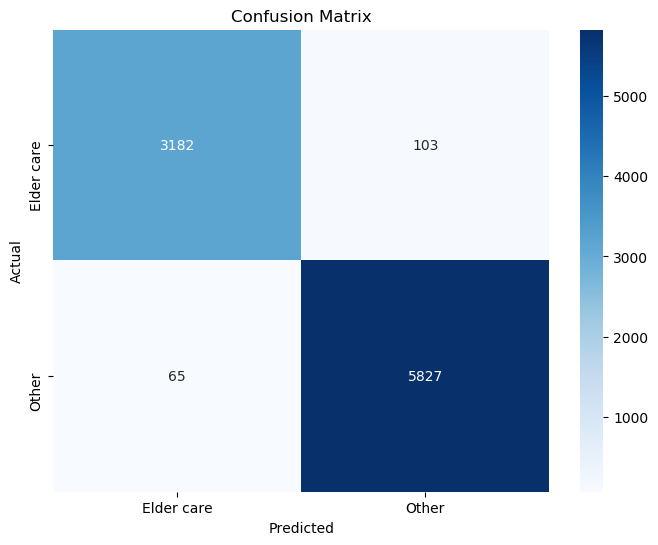

In [659]:
# # Step 15: Generate the confusion matrix
# cm = confusion_matrix(test_labels, predictions)
# label_names = ['Elder care','Other']
# # Step 16: Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

Classification Report:
Label: Elder care
  Precision: 0.9799815214043732
  Recall: 0.9686453576864535
  F1-Score: 0.9742804654011021
  Support: 3285
Label: Other
  Precision: 0.9826306913996627
  Recall: 0.9889680923285811
  F1-Score: 0.9857892065640331
  Support: 5892
F1 Score: 0.9816695362229381
Accuracy: 0.9816933638443935
Precision: 0.9816823941963799
Recall: 0.9816933638443935
AUC: 0.9788067250075173


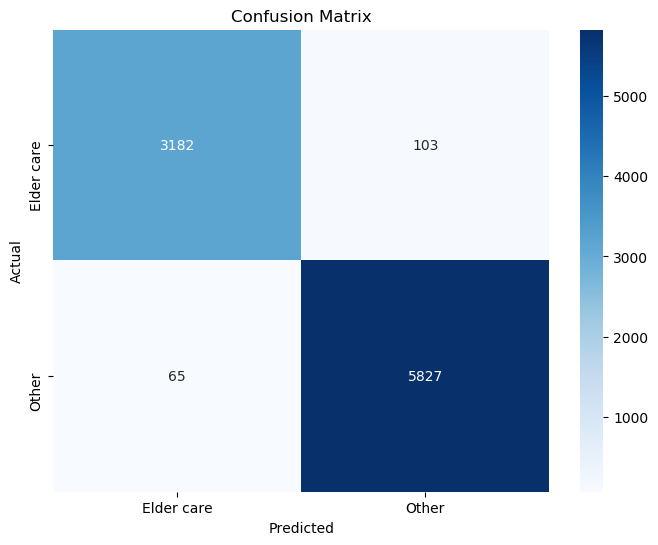

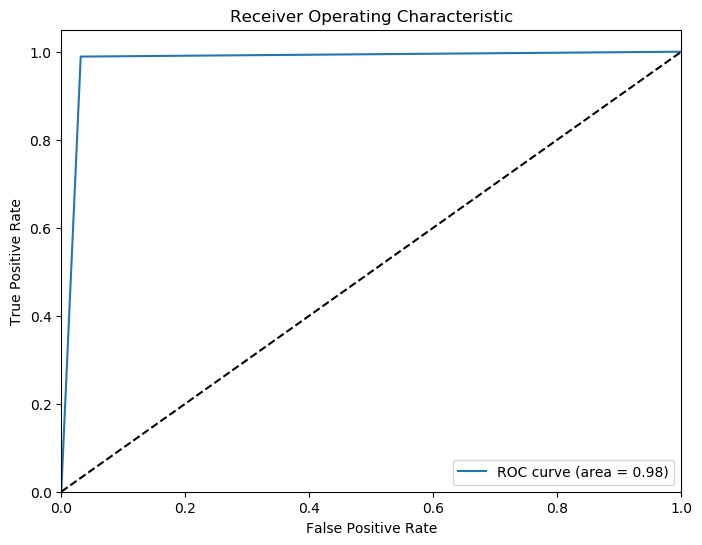

In [698]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Step 15: Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)
label_names = ['Elder care', 'Other']

# Convert labels to numerical values
test_labels_numeric = np.where(np.array(test_labels) == 'Elder care', 0, 1)
predictions_numeric = np.where(np.array(predictions) == 'Elder care', 0, 1)

# Calculate additional metrics
classification_metrics = classification_report(test_labels_numeric, predictions_numeric, target_names=label_names, output_dict=True)
fpr, tpr, thresholds = roc_curve(test_labels_numeric, predictions_numeric)
auc_score = roc_auc_score(test_labels_numeric, predictions_numeric)

# Print classification report
print("Classification Report:")
for label in label_names:
    print(f"Label: {label}")
    print(f"  Precision: {classification_metrics[label]['precision']}")
    print(f"  Recall: {classification_metrics[label]['recall']}")
    print(f"  F1-Score: {classification_metrics[label]['f1-score']}")
    print(f"  Support: {classification_metrics[label]['support']}")

# Print additional metrics
print("F1 Score:", classification_metrics['weighted avg']['f1-score'])
print("Accuracy:", classification_metrics['accuracy'])
print("Precision:", classification_metrics['weighted avg']['precision'])
print("Recall:", classification_metrics['weighted avg']['recall'])
print("AUC:", auc_score)

# Step 16: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# prediction: 

### loading data for prediction

In [28]:
import time
start_time = time.time()

In [29]:
import spacy
import en_core_web_sm
import re
import numpy as np
from concurrent.futures import ProcessPoolExecutor
from functools import partial
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

from sentence_transformers import SentenceTransformer

nlp = spacy.load("en_core_web_sm")

import boto3
import pandas as pd
import pyarrow.parquet as pq
import s3fs
import joblib

import string
import nltk
nltk.data.path.append('../../nltk_data')
from nltk.corpus import stopwords
# nltk.download('stopwords')

# Initialize S3 client
s3 = boto3.client('s3')

# Specify the S3 bucket and prefix where the Parquet files are stored
# s3://adl-core-sagemaker-studio/external/IVA/IVA_daily/
# s3://adl-core-sagemaker-studio/external/IVA/Search_daily/
# s3://adl-core-sagemaker-studio/external/Deepali/iva-data(3-apr).csv
bucket_name = 'adl-core-sagemaker-studio'
# prefix = 'external/web_clickstream/clickstream20230403_20230403/'
prefix = 'external/Deepali/search_data/'

# List all Parquet files in the bucket with the specified prefix
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
if 'Contents' in response:
    # parquet_files = [obj['Key'] for obj in response['Contents'] if obj['Key'].endswith('.parq')]
    csv_files = [obj['Key'] for obj in response['Contents'] if obj['Key'].endswith('.csv')]
else:
    # parquet_files = []
    csv_files = []

# Read Parquet files and concatenate them together
dfs = []
s3fs = s3fs.S3FileSystem()

# for file in parquet_files:
for file in csv_files:
    # Read the Parquet file into a PyArrow table
    s3_key = f"{bucket_name}/{file}"
    # dataset = pq.ParquetDataset(f"s3://{s3_key}", filesystem=s3fs)
    df = pd.read_csv(f"s3://{s3_key}")
    # table = dataset.read()
    
    # Convert the PyArrow table to a Pandas DataFrame
    # df = table.to_pandas()
    dfs.append(df)

# Concatenate all the DataFrames together
if dfs:
    concatenated_df = pd.concat(dfs, ignore_index=True)
    print(concatenated_df.head())
else:
    # print("No Parquet files found.")
    print("No csv files found.")

   person_internal_id  client_id  platform_id  \
0           124300026       7538         7538   
1            73810075       1995         1995   
2           382000024       2360         2360   
3           411840023       2346         2346   
4           356000078       2360         2360   

                         search_text  search_results  
0                         My Billing               7  
1                     Employee Stock              32  
2                          1095 Form              84  
3                         reed group             146  
4  macys cash account reirement fund             155  


In [30]:
concatenated_df.shape

(11813, 5)

In [31]:
words_3 = ['elder','elder women','elder','Octogenarians','Nonagenarians','Centenarians',
'elderly people',
 'senior assistance',
 'grey generation',
 'senior health',
 'elderly companion',
 'senior citizen',
 'elderly',
 'senior members',
 'elderly residents',
 'senior assistance',
 'grey generation',
 'elder',
 'elderly',
 'elderly people',
 'elderly residents',
 'elder',
 'elder',
 'senior citizen',
 'elder generation',
 'gerontology',
 'elderly population',
 'senior members',
 'retirees',
 'elderly population',
 'eldercare',
 'elder',
'eldercae', 'eldercarr', 'eldermann',
'eldercre','eldery','elderman','elders','eldercrae']

words_4 = set([word.lower() for word in words_3])

len(words_4)


27

In [32]:
# def check_phrases(row, col='input'):
#     if any(phrase in col for phrase in words_4):
#         return 'Yes'
#     return 'No'

# # Apply the function to create a new column
# concatenated_df['Contains_syn'] = concatenated_df.apply(check_phrases, axis=1)

In [33]:
concatenated_df.head()

,person_internal_id,client_id,platform_id,search_text,search_results
0,124300026,7538,7538,My Billing,7
1,73810075,1995,1995,Employee Stock,32
2,382000024,2360,2360,1095 Form,84
3,411840023,2346,2346,reed group,146
4,356000078,2360,2360,macys cash account reirement fund,155


In [34]:

def clean_text(df, text_cols):
    # Create a new dataframe to hold the cleaned text columns
    cleaned_df = pd.DataFrame()
    
    # Define the list of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Clean each text column and add it to the cleaned dataframe
    for text_col in text_cols:
        text_list = df[text_col].tolist()
        text_list = [str(text) for text in text_list]
        text_list = [text if text.strip() and not
                     set(text).issubset(set(string.punctuation + string.whitespace)) else '' 
                     for text in text_list]
        text_list = [x.lower() for x in text_list]
        translator = str.maketrans(string.punctuation + string.digits + "_", " " * len(
            string.punctuation + string.digits + "_"))
        cleaned_list = []
        for text in text_list:
            cleaned_text = text.translate(translator)
            cleaned_text = ' '.join(cleaned_text.split())
            cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in stop_words])
            cleaned_list.append(cleaned_text)
        cleaned_df[text_col] = cleaned_list
    
    # Add the non-text columns to the cleaned dataframe
    for col in df.columns:
        if col not in text_cols:
            cleaned_df[col] = df[col]
    
    return cleaned_df


In [35]:
# concatenated_df.columns

In [36]:
# concatenated_df= concatenated_df[['client_id','person_internal_id','page_name']]
concatenated_df= concatenated_df[['client_id','person_internal_id','search_text']]

In [37]:
# concatenated_df.head()

In [38]:
concatenated_df.shape

(11813, 3)

In [39]:
# cleaned_concatenated_df = clean_text(concatenated_df, text_cols=['page_name'])
cleaned_concatenated_df = clean_text(concatenated_df, text_cols=['search_text'])

In [40]:
# cleaned_concatenated_df.head()

In [41]:
# text_preprocessed_cleaned_concatenated_df = text_preprocess(cleaned_concatenated_df, col='reportingfields_fieldvalue1' )

In [42]:
# Step 10: Load the model


loaded_model = joblib.load('Bert_EC_model/ec_model.pkl')
model = SentenceTransformer('all-MiniLM-L6-v2')

# Step 12: Encode the text samples from the Parquet file
encodings = model.encode(cleaned_concatenated_df['search_text'].fillna(' ').tolist())

# Step 13: Make predictions for the encoded samples
cleaned_concatenated_df['prediction'] = loaded_model.predict(encodings)
# text_preprocessed_cleaned_concatenated_df['confidence_level'] = np.max(loaded_model.predict_proba(encodings), axis=1)

# Step 14: Save the predictions in an Excel file
cleaned_concatenated_df.to_excel('ec_search_3april_predictions.xlsx', index=False)

elapsed_time = time.time() - start_time
print(elapsed_time)

28.521339416503906


In [ ]:
import time
start_time = time.time()

import spacy
import en_core_web_sm

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

nlp = spacy.load("en_core_web_sm")

In [20]:
import boto3
import pyarrow.parquet as pq
import s3fs

# Initialize S3 client
s3 = boto3.client('s3')

# Specify the S3 bucket and prefix where the Parquet files are stored
bucket_name = 'adl-core-sagemaker-studio'
prefix = 'external/web_clickstream/clickstream20230403_20230403/'

# List all Parquet files in the bucket with the specified prefix
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
if 'Contents' in response:
    parquet_files = [obj['Key'] for obj in response['Contents'] if obj['Key'].endswith('.parq')]
else:
    parquet_files = []

# Read Parquet files and concatenate them together
dfs = []
s3fs = s3fs.S3FileSystem()

for file in parquet_files:
    # Read the Parquet file into a PyArrow table
    s3_key = f"{bucket_name}/{file}"
    dataset = pq.ParquetDataset(f"s3://{s3_key}", filesystem=s3fs)
    table = dataset.read()
    
    # Convert the PyArrow table to a Pandas DataFrame
    df = table.to_pandas()
    dfs.append(df)

# Concatenate all the DataFrames together
if dfs:
    concatenated_df = pd.concat(dfs, ignore_index=True)
    print(concatenated_df.head())
else:
    print("No Parquet files found.")

                           web_page_detail_event_key  \
0  b'-78rg69zVADh2W1BGlZ_nAg_1487#2023-04-03 11:1...   
1  b'-78rg69zVADh2W1BGlZ_nAg_1487#2023-04-03 11:1...   
2  b'-78rg69zVADh2W1BGlZ_nAg_1487#2023-04-03 11:1...   
3  b'-78rg69zVADh2W1BGlZ_nAg_1487#2023-04-03 11:1...   
4  b'-78rg69zVADh2W1BGlZ_nAg_1487#2023-04-03 11:1...   

                   web_page_detail_event_key_columns client_key  \
0  b'web_session_id#session_create_timestamp_cst_...   b'11487'   
1  b'web_session_id#session_create_timestamp_cst_...   b'11487'   
2  b'web_session_id#session_create_timestamp_cst_...   b'11487'   
3  b'web_session_id#session_create_timestamp_cst_...   b'11487'   
4  b'web_session_id#session_create_timestamp_cst_...   b'11487'   

                                  implementation_key  platform_id  client_id  \
0  b'148714873jxgemzn5qhzvwzg1avc42clfkdt05vcylcn...         1487       1487   
1  b'148714873jxgemzn5qhzvwzg1avc42clfkdt05vcylcn...         1487       1487   
2  b'148714873jxgemz

In [21]:
concatenated_df= concatenated_df[['client_id','person_internal_id','page_name']]

In [22]:
import string
import nltk
nltk.data.path.append('../../nltk_data')
from nltk.corpus import stopwords
# nltk.download('stopwords')


In [23]:
def clean_text(df, text_cols):
    # Create a new dataframe to hold the cleaned text columns
    cleaned_df = pd.DataFrame()
    
    # Define the list of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Clean each text column and add it to the cleaned dataframe
    for text_col in text_cols:
        text_list = df[text_col].tolist()
        text_list = [str(text) for text in text_list]
        text_list = [text if text.strip() and not
                     set(text).issubset(set(string.punctuation + string.whitespace)) else '' 
                     for text in text_list]
        text_list = [x.lower() for x in text_list]
        translator = str.maketrans(string.punctuation + string.digits + "_", " " * len(
            string.punctuation + string.digits + "_"))
        cleaned_list = []
        for text in text_list:
            cleaned_text = text.translate(translator)
            cleaned_text = ' '.join(cleaned_text.split())
            cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in stop_words])
            cleaned_list.append(cleaned_text)
        cleaned_df[text_col] = cleaned_list
    
    # Add the non-text columns to the cleaned dataframe
    for col in df.columns:
        if col not in text_cols:
            cleaned_df[col] = df[col]
    
    return cleaned_df


In [24]:
cleaned_concatenated_df = clean_text(concatenated_df, text_cols=['page_name'])

In [25]:
import re
import numpy as np
from concurrent.futures import ProcessPoolExecutor
from functools import partial

def count_intnt_entits(doc):
    intents = [token.text for token in doc if token.pos_ == 'VERB']
    entities = [token.text for token in doc if token.pos_ in {'NOUN', 'PROPN', 'ADJ', 'NUM', 'ADV'}]
    return len(intents), len(entities)

def extract_ner_entities(doc, sentence):
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

def length_entities(list_entities):
    if (list_entities == np.nan or list_entities is None or list_entities == ''):
        return 0
    else:
        return len(list_entities)

def filter_named_entities(doc, text):
    filtered_words = [token.text for token in doc if token.ent_type_ not in ['ORG', 'PERSON', 'GPE', 'LOC', 'FAC']]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def process_text(text):
    doc = nlp(text)
    intents, entities = count_intnt_entits(doc)
    ner_entities = extract_ner_entities(doc, text)
    len_ner_entities = length_entities(ner_entities)
    filtered_text = filter_named_entities(doc, text)
    return intents, entities, ner_entities, len_ner_entities, filtered_text

def text_preprocess(dataframe, col='page_name'):
    dataframe = dataframe.drop_duplicates()
    texts = dataframe[col].tolist()
    # texts = dataframe['text'].tolist()
    with ProcessPoolExecutor(max_workers=96) as executor:
        processed_results = list(executor.map(process_text, texts))

    intents, entities, ner_entities, len_ner_entities, filtered_texts = zip(*processed_results)
    
    dataframe['no_of_intents'] = intents
    dataframe['no_of_entities'] = entities
    dataframe['ner_enities'] = ner_entities
    dataframe['len_ner_enities'] = len_ner_entities
    dataframe[col]= filtered_texts
    
    dataframe = dataframe[dataframe['len_ner_enities'] > 0]
    dataframe[col] = dataframe[col].str.strip()
    dataframe = dataframe.drop(['no_of_intents', 'no_of_entities', 'ner_enities', 'len_ner_enities'], axis=1)
    
    return dataframe


In [26]:
text_preprocessed_cleaned_concatenated_df = text_preprocess(cleaned_concatenated_df, col='page_name' )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [28]:
# Step 10: Load the model
import joblib
loaded_model = joblib.load('Bert_EC_model/ec_model.pkl')
model = SentenceTransformer('all-MiniLM-L6-v2')

# Step 12: Encode the text samples from the Parquet file
encodings = model.encode(text_preprocessed_cleaned_concatenated_df['page_name'].fillna(' ').tolist())

# Step 13: Make predictions for the encoded samples
text_preprocessed_cleaned_concatenated_df['prediction'] = loaded_model.predict(encodings)
# text_preprocessed_cleaned_concatenated_df['confidence_level'] = np.max(loaded_model.predict_proba(encodings), axis=1)

# Step 14: Save the predictions in an Excel file
text_preprocessed_cleaned_concatenated_df.to_excel('ec_3april_web_predictions.xlsx', index=False)

elapsed_time = time.time() - start_time
print(elapsed_time)

2223.426661968231


In [693]:
import time
start_time = time.time()

# Step 10: Load the model
loaded_model = joblib.load('Bert_EC_model/ec_model.pkl')

# Step 11: Read data from Parquet file
# data = pd.read_csv('query-impala-160880_search_3_4April.csv')[['reportingfields_fieldvalue1']]
data = pd.read_parquet('clickstream20230406_2023040620230406_20230406.10.parq')['page_name']
data.head()

0       b'CSERR200DFLTCRTCOPEN'
1    b'CSLOGN020ENTRPRSNIDOPEN'
2    b'CSLOGN020ENTRPRSNIDOPEN'
3          b'CSLOGN010INPTOPEN'
4       b'CSERR200DFLTCRTCOPEN'
Name: business_page_name, dtype: object

In [687]:
data.shape

(20262, 1)

In [689]:
# Step 12: Encode the text samples from the Parquet file
encodings = model.encode(data['reportingfields_fieldvalue1'].fillna(' ').tolist())

# Step 13: Make predictions for the encoded samples
data['prediction'] = loaded_model.predict(encodings)

# Step 14: Save the predictions in an Excel file
data.to_excel('search_query-impala-160880_search_3_4April_ec_predictions.xlsx', index=False)

elapsed_time = time.time() - start_time
print(elapsed_time)

56.63199019432068


In [662]:
# list_of_texts = ["senior-citizen?care expense reimbursement", 
#                  "elderly*care plus",
#                  "aging care home", "retirees care reimbirsement", 
#                  "senior assistance required","Daycare@expense reimbursement",
#                  "baby care licensed", "oldsters care home","geriatric care home",
#                  "contentPage 2023 Eldercare!!!!!!!!!!!!!****@_Subsidy","Elder statesmen care",
#                  "Elder women care","Silver generation care",
#                  "contentPage {}[]/\|?><,.;:!@#+\t\n\r\f\v 2023 Elder care Subsidy","gerontology care",
#                  "Elderly Care Plus Information"]


### convert saved model .bin and config.json to .pkl compatible files

In [ ]:
# convert saved model .bin and config.json to .pkl compatible files
from transformers import AutoConfig, AutoModelForSequenceClassification
import torch
import pickle

# Load the model configuration from the config.json file
config = AutoConfig.from_pretrained('EC_model_outer_combined_texts_data_v6', num_labels=2)

# Load the model from the binary file using the configuration
model = AutoModelForSequenceClassification.from_pretrained('EC_model_outer_combined_texts_data_v6', config=config)

# Save the model and configuration as a pickle file
with open('EC_model_outer_combined_texts_data_v6/EC_model.pkl', 'wb') as f:
    pickle.dump((config, model.state_dict()), f)

## tagging the unseen_data for analysisng the predictions

### finding the texts which contain exact phrases from synonyms list

In [41]:
words_3 = ['older parent','older people','grand parents','elder','old parents','elder women',
 'silver generation','aged people', 'older women','older men','old age home','elder',
 'aged',
 'elderly people',
 'senior assistance',
 'aging-in-place',
 'aged population',
 'golden agers',
 'aging in place',
 'grey generation',
 'silver generation',
 'senior health',
 'aged population',
 'elderly companion',
 'golden agers',
 'senior citizen',
 'elder support',
 'elderly',
 'senior members',
 'elder population',
 'elderly residents',
 'senior assistance',
 'oldsters',
 'grey generation',
 'aging population',
 'elder statesmen',
 'elderly',
 'elderly people',
 'aging',
 'elderly residents',
 'elder',
 'elder women',
 'senior',
 'elder generation',
 'gerontology',
 'elderly population',
 'senior members',
 'retirees',
 'elderly population',
 'eldercare',
 'geriatric',
 'elder statesmen',
 'age related',
 'retirees',
 'third age population',
 'aging population',
 'elder population',
 'oldsters',
 'third age population','eldercae', 'eldercarr', 'eldermann', 
'aged home','eldercre','eldery','elderman','elders','eldercrae',]
words_4 = list(set([word.lower() for word in words_3]))
len(words_4)

49

In [42]:
df_cleaned = pd.DataFrame()
df_cleaned['text'] =cleaned_text_list
df_cleaned.head(5)

,text
0,welcomeuserfollowup
1,medical plan credit
2,welcomeuser
3,general purpose loans
4,chiropractor visits


In [43]:
mask = (df_cleaned['text'].str.contains(r'\b(' + '|'.join(words_4) + r')\b', case=False, na=False))

df_cleaned['category'] = ''
df_cleaned.loc[mask, 'category'] = 'Elder care'
# df_combined_web_iva_search.loc[df_combined_web_iva_search['category'] == '', 'category'] = 'Other'

df_cleaned.head(5)

/tmp/ipykernel_74027/3427755096.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = (df_cleaned['text'].str.contains(r'\b(' + '|'.join(words_4) + r')\b', case=False, na=False))


,text,category
0,welcomeuserfollowup,
1,medical plan credit,
2,welcomeuser,
3,general purpose loans,
4,chiropractor visits,


In [45]:
df_cleaned[df_cleaned['category']=='Elder care'].sample(1)

,text,category
5666,ongoing elderly care,Elder care


In [46]:
df_cleaned[df_cleaned['category']=='Elder care'].shape

(13, 2)

### get text which are similar to phrases in synonnyms list for texts other than which are filtered above

In [50]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [51]:
def find_similar_sentences(df, sentences, phrases, threshold=0.95, category_name = 'Elder care'):
    # encode the phrases using the model
    phrase_embeddings = model.encode(phrases, convert_to_tensor=True)
    
    # initialize an empty list to store the similar sentences
    similar_sentences = []
    
    # iterate over the sentences
    for sentence in sentences:
        # encode the sentence using the model
        sentence_embedding = model.encode(sentence, convert_to_tensor=True)
        # reshape the sentence embedding to a 2D array
        sentence_embedding = sentence_embedding.reshape(1, -1)
        
        # calculate the cosine similarity between the sentence embedding and each phrase embedding
        cosine_scores = 1 - cosine_distances(sentence_embedding, phrase_embeddings)
        
        # convert the cosine similarity scores to a list
        scores_list = cosine_scores.tolist()[0]
        
        # iterate over the phrases and similarity scores and append the sentence to the list if it meets the threshold for at least one phrase
        for phrase, score in zip(phrases, scores_list):
            if score >= threshold:
                similar_sentences.append(sentence)
                break
    
    # convert the list of similar sentences to a set to remove duplicates
    similar_sentences = set(similar_sentences)
    
    # create a new dataframe containing only the rows with text that is in the set of similar sentences
    similar_df = df[df['text'].isin(similar_sentences)]
    similar_df['category']=category_name
    return similar_df

In [52]:
similar_df_unseen = find_similar_sentences(df_cleaned, 
                                    df_cleaned[df_cleaned['category']=='']['text'].to_list(), 
                                    words_4)

/tmp/ipykernel_74027/2749835889.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_df['category']=category_name


In [53]:
similar_df_unseen

,text,category
7095,retiremen,Elder care


In [54]:
unseen_EC_df = pd.concat([df_cleaned[df_cleaned['category']=='Elder care'], 
                       similar_df_unseen]).sample(frac=1)

In [55]:
unseen_EC_df.shape

(14, 2)

In [56]:
unseen_EC_df.drop_duplicates(inplace=True)

In [57]:
unseen_EC_df.shape

(14, 2)

In [58]:
# filter out the rows with similar text from the original DataFrame
non_similar_unseen_df = df_cleaned[~df_cleaned['text'].isin(unseen_EC_df['text'])]

# sample twice as many rows from the non-similar DataFrame as there are in the similar DataFrame
# non_similar_df = non_similar_df.sample(n=only_EC_df.shape[0]*2)
non_similar_unseen_df['category'] = 'Other'

/tmp/ipykernel_74027/3802977147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_similar_unseen_df['category'] = 'Other'


In [59]:
df_unseen_concatenated = pd.concat([unseen_EC_df, non_similar_unseen_df]).sample(frac=1).reset_index(drop=True)
# df_concatenated = df_concatenated
# df_concatenated.drop(columns=['input', 'search_text', 'page_name'], inplace=True)

In [60]:
pd.set_option('display.max_colwidth', None)

In [61]:
df_unseen_concatenated.shape

(12584, 2)

In [62]:
df_unseen_concatenated[(df_unseen_concatenated.text.str.contains('elder')) & (df_unseen_concatenated.category=='Other')]

,text,category


In [63]:
pd.reset_option('display.max_colwidth')

In [64]:
df_unseen_concatenated.to_excel('labelled_unseen_data.xlsx')